In [185]:
import math

import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import signal
from tqdm.notebook import tqdm

### load all M4 data

In [2]:
df_hourly = pd.read_csv("../m4_data/Hourly-train.csv")
print("hourly read: {}".format(df_hourly.shape))
df_daily = pd.read_csv("../m4_data/Daily-train.csv")
print("daily read: {}".format(df_daily.shape))
df_weekly = pd.read_csv("../m4_data/Weekly-train.csv")
print("weekly: {}".format(df_weekly.shape))
df_monthly = pd.read_csv("../m4_data/Monthly-train.csv")
print("monthly: {}".format(df_monthly.shape))
df_quarterly = pd.read_csv("../m4_data/Quarterly-train.csv")
print("quarterly: {}".format(df_quarterly.shape))
df_yearly = pd.read_csv("../m4_data/Yearly-train.csv")
print("yearly: {}".format(df_yearly.shape))

df_all = pd.concat([df_hourly,
                   df_daily,
                   df_weekly,
                    df_monthly,
                   df_quarterly,
                   df_yearly])

df_hourly = None
df_daily = None
df_weekly = None
df_monthly = None
df_quarterly = None
df_yearly = None

hourly read: (414, 961)
daily read: (4227, 9920)
weekly: (359, 2598)
monthly: (48000, 2795)
quarterly: (24000, 867)
yearly: (23000, 836)


### Select random sample

In [3]:
ref = 1000

In [195]:
samples = df_all['V1'].sample(40).to_list()

In [196]:
samples

['M36703',
 'Y13827',
 'Q102',
 'M41021',
 'Y13764',
 'Y20542',
 'M9521',
 'M34821',
 'M4853',
 'Q16974',
 'Y14612',
 'M20491',
 'M21509',
 'D3863',
 'Y13917',
 'M683',
 'M4651',
 'Y10200',
 'Q8927',
 'M6808',
 'M2395',
 'Q22804',
 'M12525',
 'M40061',
 'M36052',
 'M9294',
 'M47621',
 'Q11824',
 'Y18985',
 'M13795',
 'Y22975',
 'M7267',
 'M577',
 'Y14134',
 'Y14503',
 'M6120',
 'Q23866',
 'M692',
 'M38571',
 'D1358']

### Define plotting function

In [204]:
def generate_plots_welch(samples: list,
                   df_all: pd.DataFrame,
                  ax ) -> None:
    for ts_name in samples:
        f = np.array(df_all[df_all['V1']==ts_name].iloc[:,1:].dropna(axis=1))[0]
        n = f.shape[0]
        seg_length = np.floor(1/20*n)
        if seg_length == 0:
            seg_length=10
#         fhat = np.fft.fft(f)
#         PSD = np.real(fhat * np.conj(fhat) / n)
#         freq = np.arange(n)/f.size
        welch_freqs, PSD_welch = signal.welch(f, nperseg=seg_length,
                                              window='hamming')
#         L = np.arange(1,np.floor(n/2),dtype='int')
        
        ax.plot(welch_freqs,PSD_welch, linewidth=2, label=ts_name)
        ax.set_xscale('log')

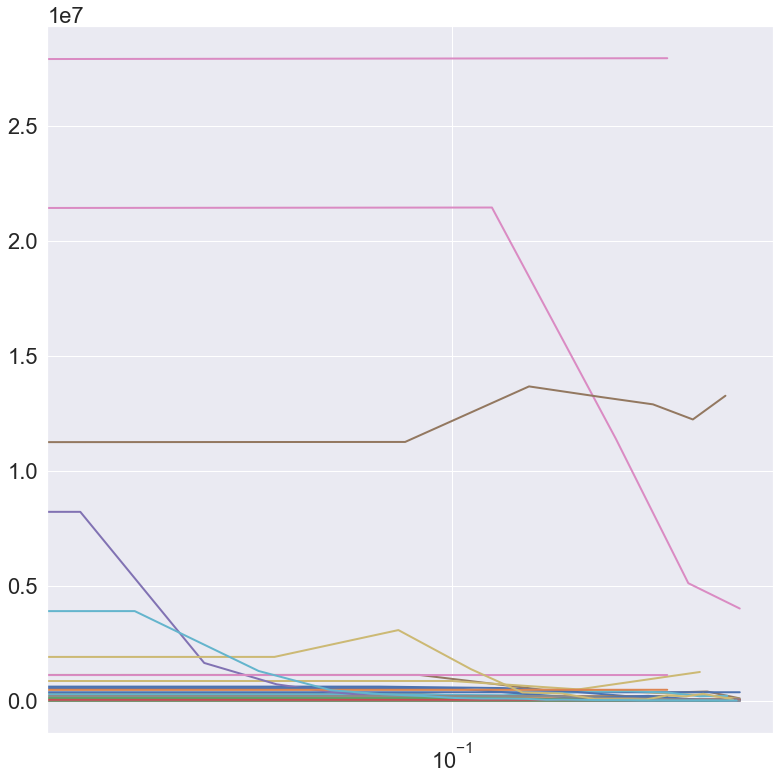

In [205]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot()

#ax.set_yscale('log')

ax = generate_plots_welch(samples,df_all, ax)

In [183]:
def generate_plots(samples: list,
                   df_all: pd.DataFrame,
                  ax ) -> None:
    for ts_name in samples:
        f = np.array(df_all[df_all['V1']==ts_name].iloc[:,1:].dropna(axis=1))[0]
        n = f.shape[0]
        fhat = np.fft.fft(f)
        PSD = np.real(fhat * np.conj(fhat) / n)
        freq = np.arange(n)/f.size
        L = np.arange(1,np.floor(n/2),dtype='int')
        
        ax.plot(freq[L],PSD[L], linewidth=2, label=ts_name)
        ax.set_xscale('log')
      
    

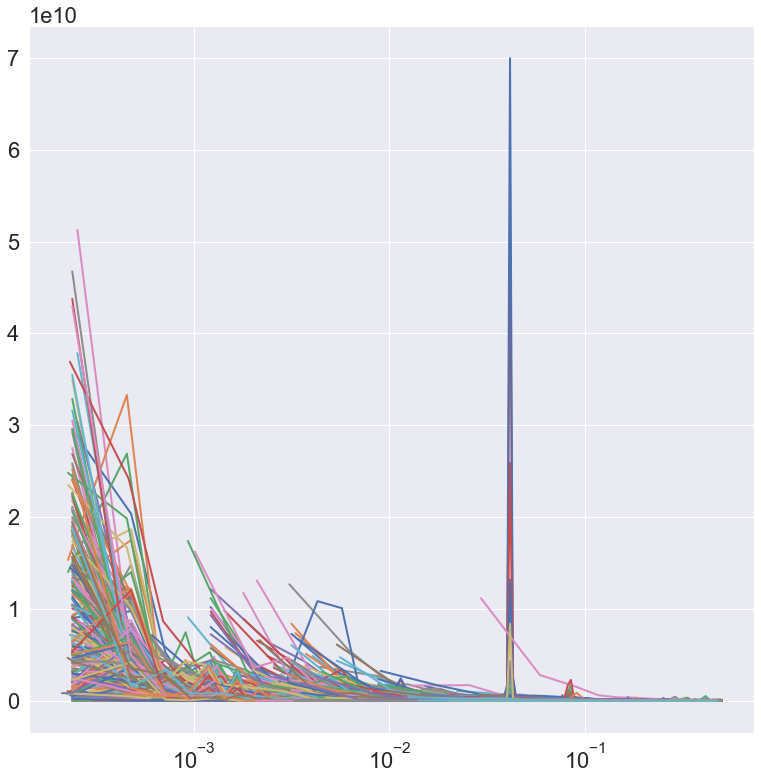

In [184]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot()

#ax.set_yscale('log')

ax = generate_plots(samples,df_all, ax)
#ax.set_xscale('log')


### Example

In [99]:
samples[:20]

['Y18038',
 'M43104',
 'M3670',
 'M957',
 'M18041',
 'M38237',
 'M37822',
 'M25774',
 'Y12863',
 'M31944',
 'M33687',
 'Y8350',
 'M37188',
 'Y9144',
 'Q9273',
 'Q17807',
 'Y16959',
 'Y1287',
 'M17662',
 'Y2005']

In [55]:
np.arange(3)

array([0, 1, 2])

In [116]:
ts_name = df_all['V1'].sample().values[0]

'M10358'

(234,)
(234,)


/Users/philipp/anaconda3/envs/unic2/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


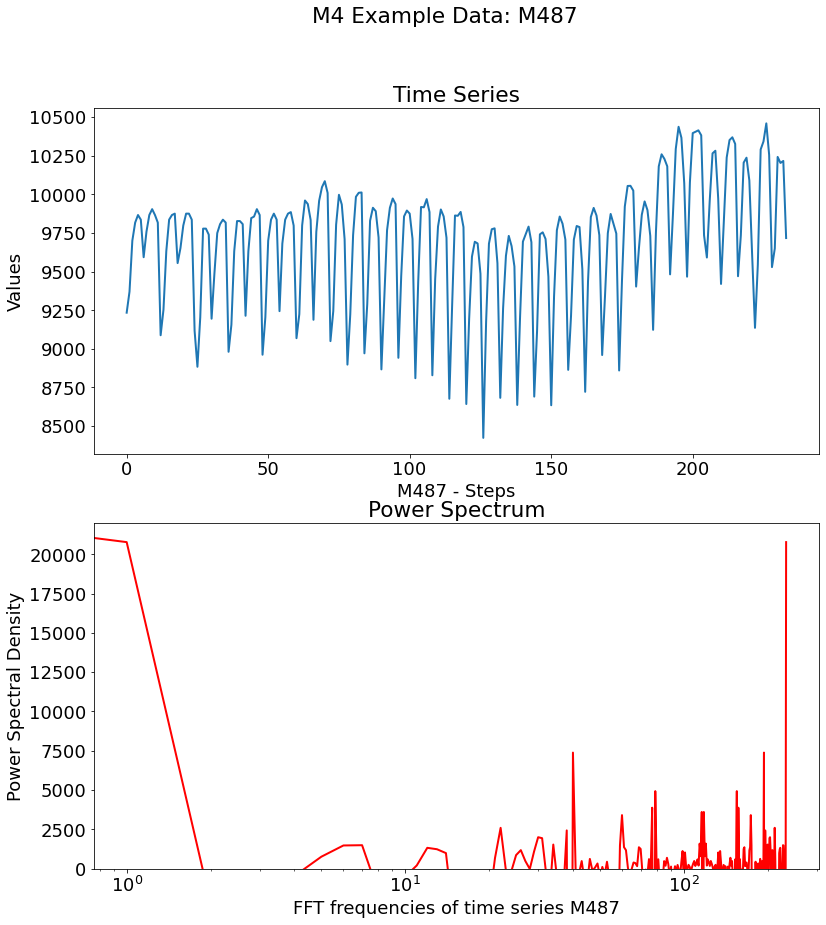

In [135]:
# series
f = np.array(df_all[df_all['V1']==ts_name].iloc[:,1:].dropna(axis=1))[0]
x = np.arange(f.shape[0])

# fft
fhat = np.fft.fft(f)
print(f.shape)
print(f.shape)
PSD = np.real(fhat * np.conj(fhat) / n)
freq = np.arange(fhat.shape[0])
L = np.arange(1,np.floor(n/2),dtype='int')
fig, axs = plt.subplots(2,figsize=(13,14))
fig.suptitle('M4 Example Data: ' + ts_name)
axs[0].set_title("Time Series")
axs[0].set_xlabel(ts_name+" - Steps")
axs[0].set_ylabel("Values")
axs[0].plot(x, f, lw=2)
axs[1].set_title("Power Spectrum")
axs[1].plot(freq, fhat, lw=2, color='r')
axs[1].set_xlabel("FFT frequencies of time series "+ts_name)
axs[1].set_ylabel("Power Spectral Density")
axs[1].set_xscale('log')
axs[1].set_ylim([0,22000])
plt.savefig("../img/fft_example.png")

### Get average frequency of M4

In [136]:
def get_length(s: pd.Series) -> pd.Series:
    return s.iloc[1:].dropna().shape[0]

In [139]:
tqdm.pandas()
s_len = df_all.progress_apply(func=get_length, axis=1)

  0%|          | 0/100000 [00:00<?, ?it/s]

In [158]:
b = int(math.floor(math.log(len(s_len), 2)))

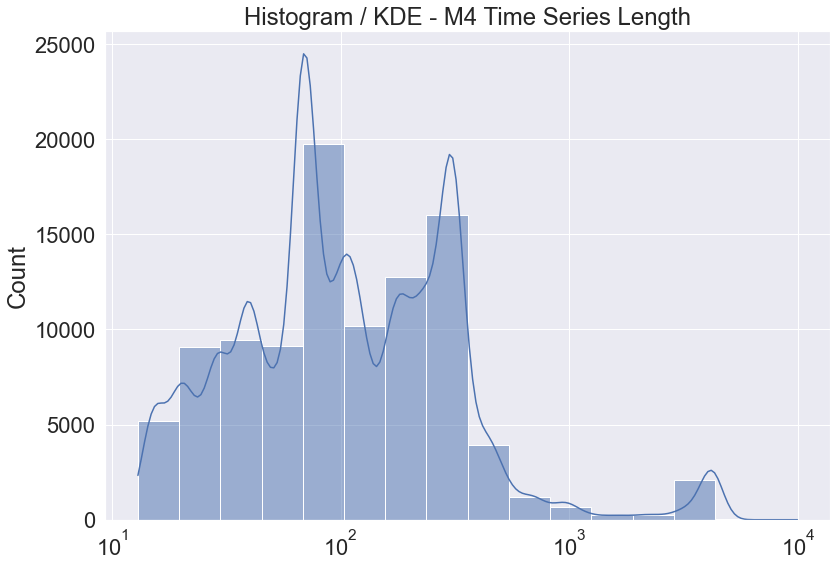

In [168]:
sns.set(font_scale=2)

fig, ax = plt.subplots(figsize=(13,9))
ax = sns.histplot(data=s_len, bins=b, kde=True, log_scale=True);
ax.set_title("Histogram / KDE - M4 Time Series Length")
fig.savefig("../img/hist_m4_ts_len.png")

In [143]:
print("mean: {}".format(s_len.mean()))
print("median: {}".format(s_len.median()))
print("mode: {}".format(s_len.mode()))

mean: 240.02047
median: 97.0
mode: 0    69
dtype: int64


In [78]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 18})

# Create a simple signal with two frequencies
dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) # Sum of 2 frequencies
f_clean = f
f = f + 2.5*np.random.randn(len(t))              # Add some noise

In [20]:
## Compute the Fast Fourier Transform (FFT)

n = len(t)
fhat = np.fft.fft(f,n)                     # Compute the FFT
PSD = fhat * np.conj(fhat) / n             # Power spectrum (power per freq)
freq = (1/(dt*n)) * np.arange(n)           # Create x-axis of frequencies in Hz
L = np.arange(1,np.floor(n/2),dtype='int') # Only plot the first half of freqs


In [149]:
np.arange(3)*1/3

array([0.        , 0.33333333, 0.66666667])